<a href="https://colab.research.google.com/github/dlguswn3659/2020_Image_Lab/blob/master/hair_removal/hair_removal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
!pip install -q pydicom

In [17]:
from PIL import Image
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_files

In [18]:
from google.colab.patches import cv2_imshow

!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0    97k      0 --:--:-- --:--:-- --:--:--   97k


In [19]:
pip install -q tensorflow-io

In [20]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_io as tfio

original image


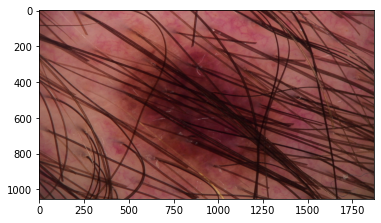

(1053, 1872, 3)
GrayScaled Image


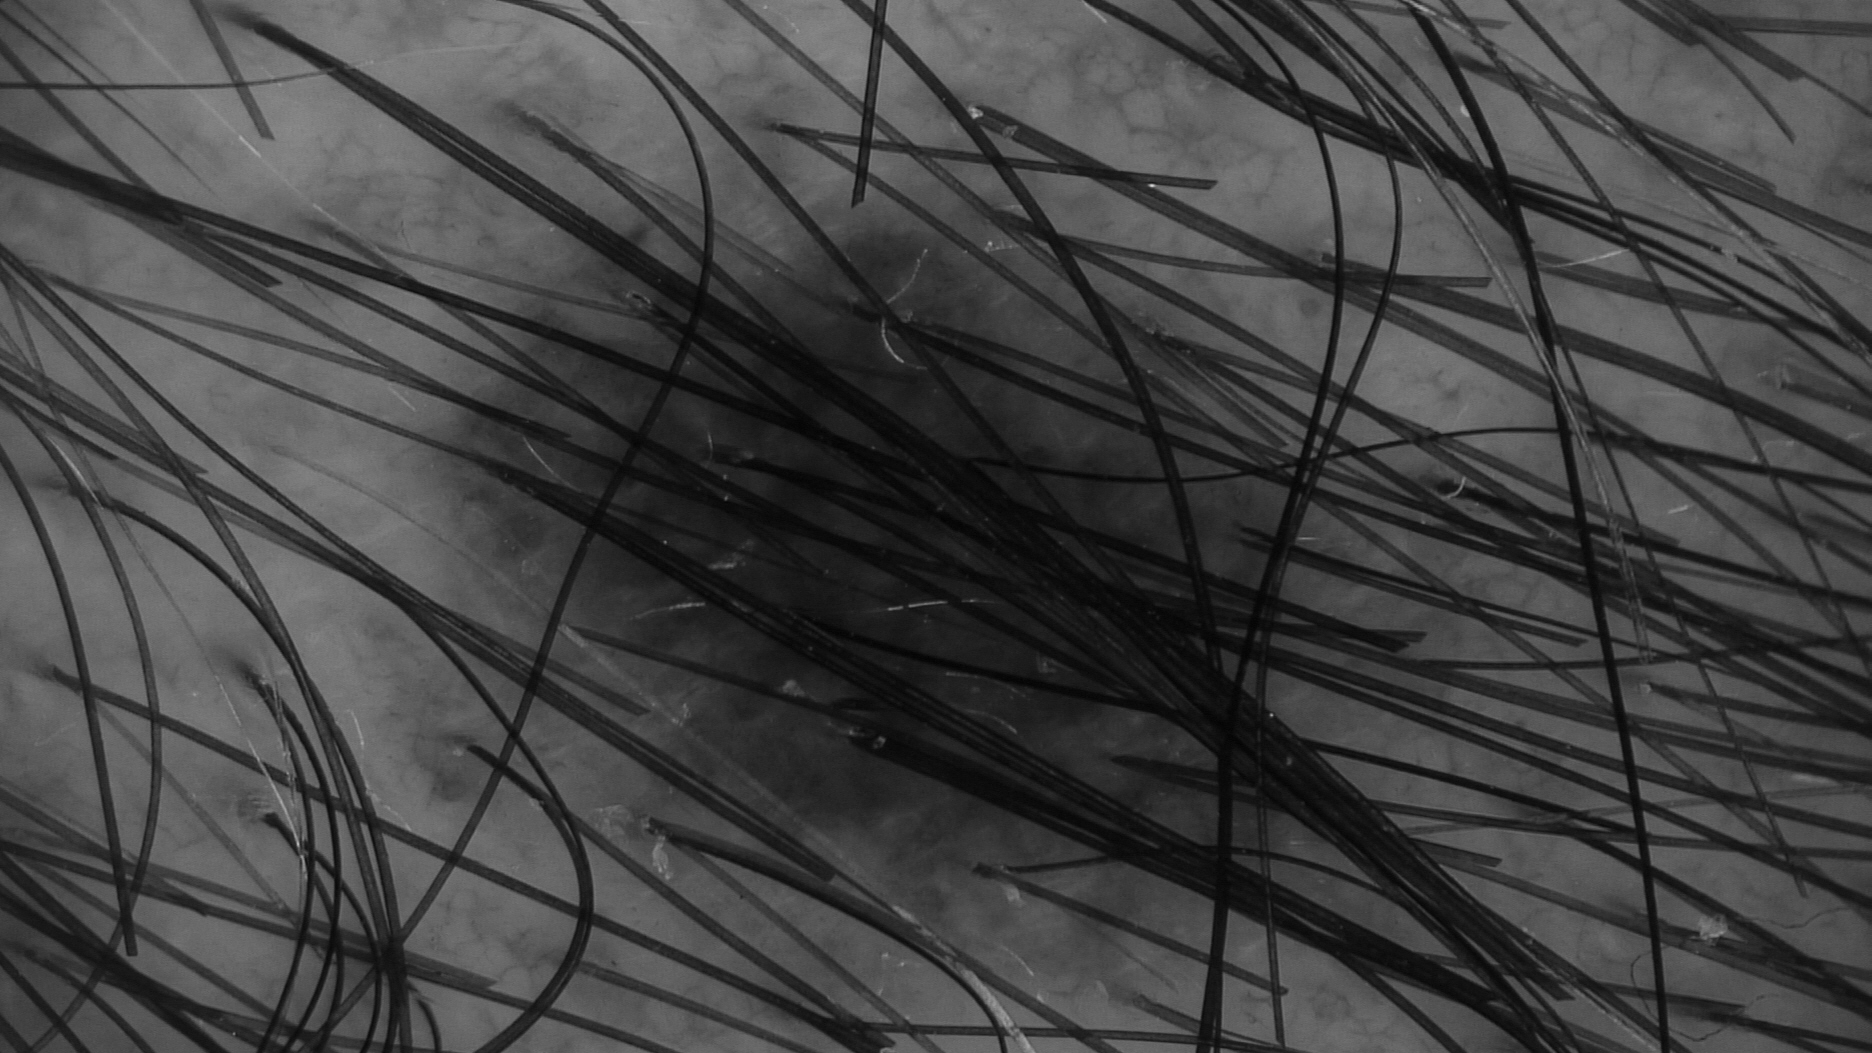

BlackHat filtering result


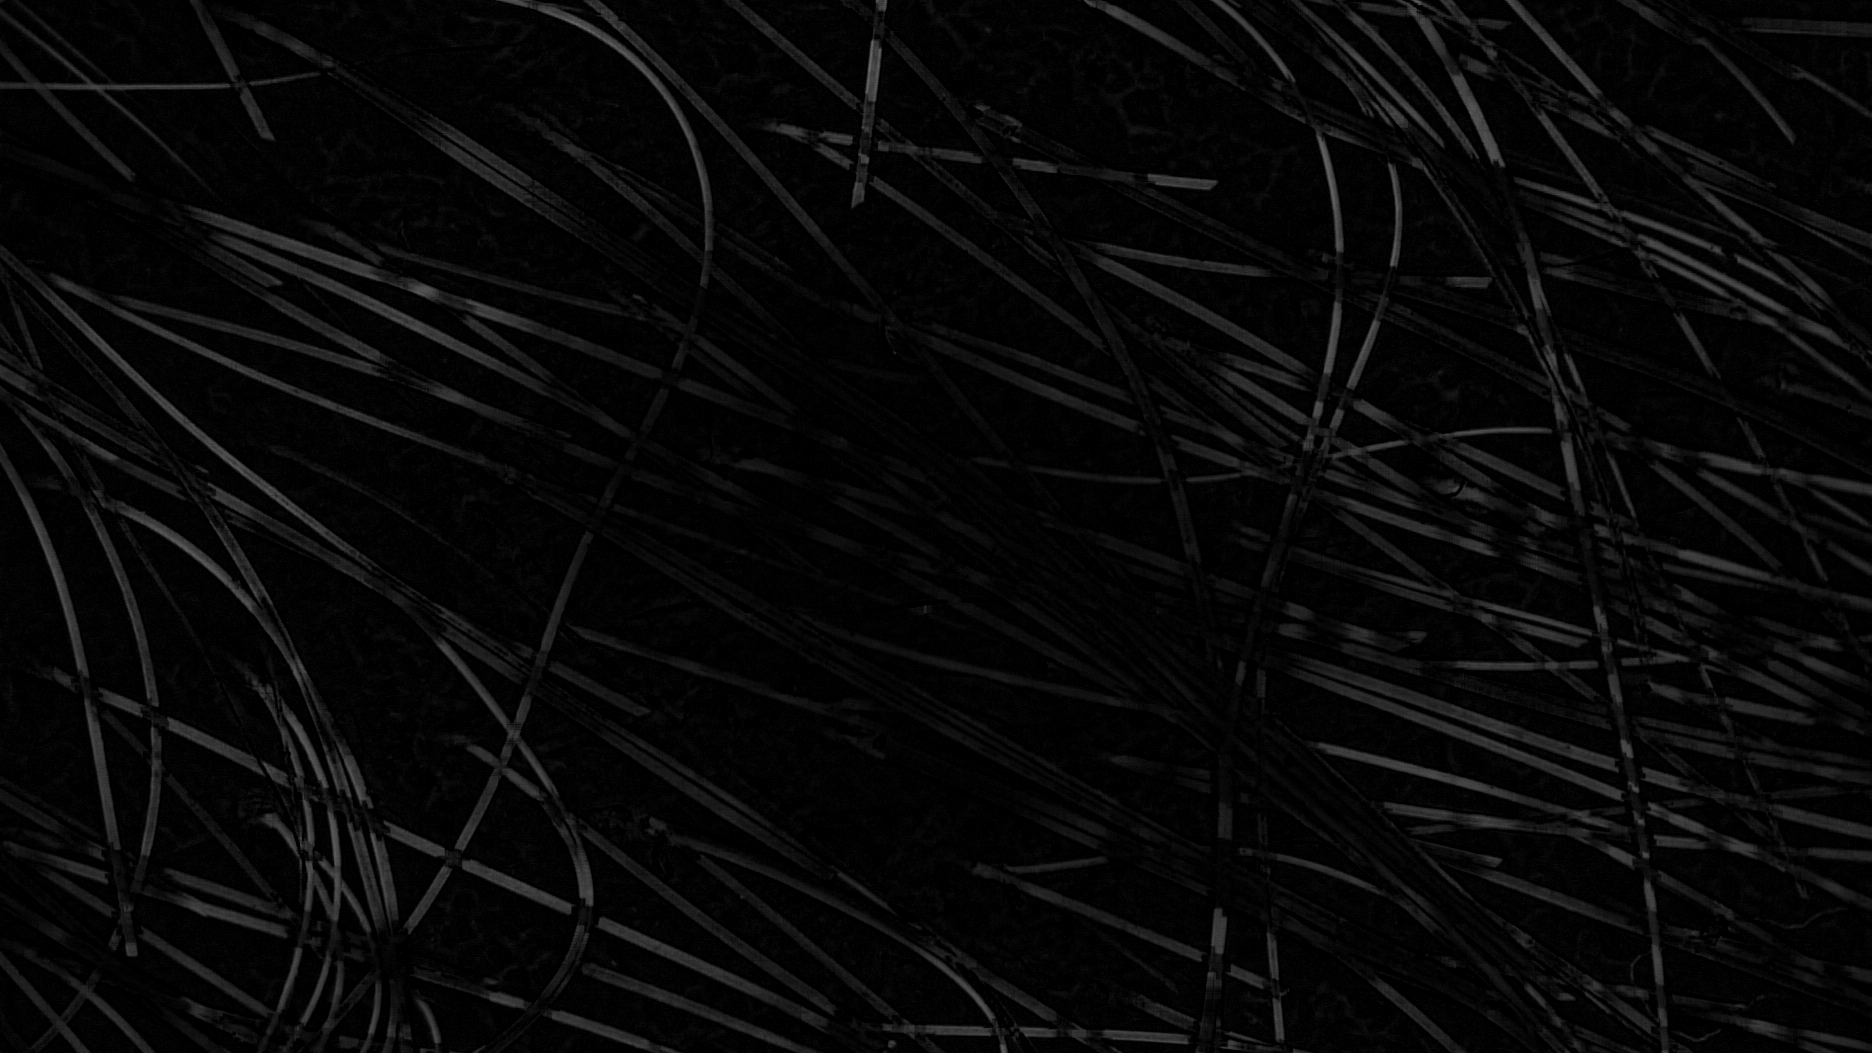

Thresholded image for inpainting


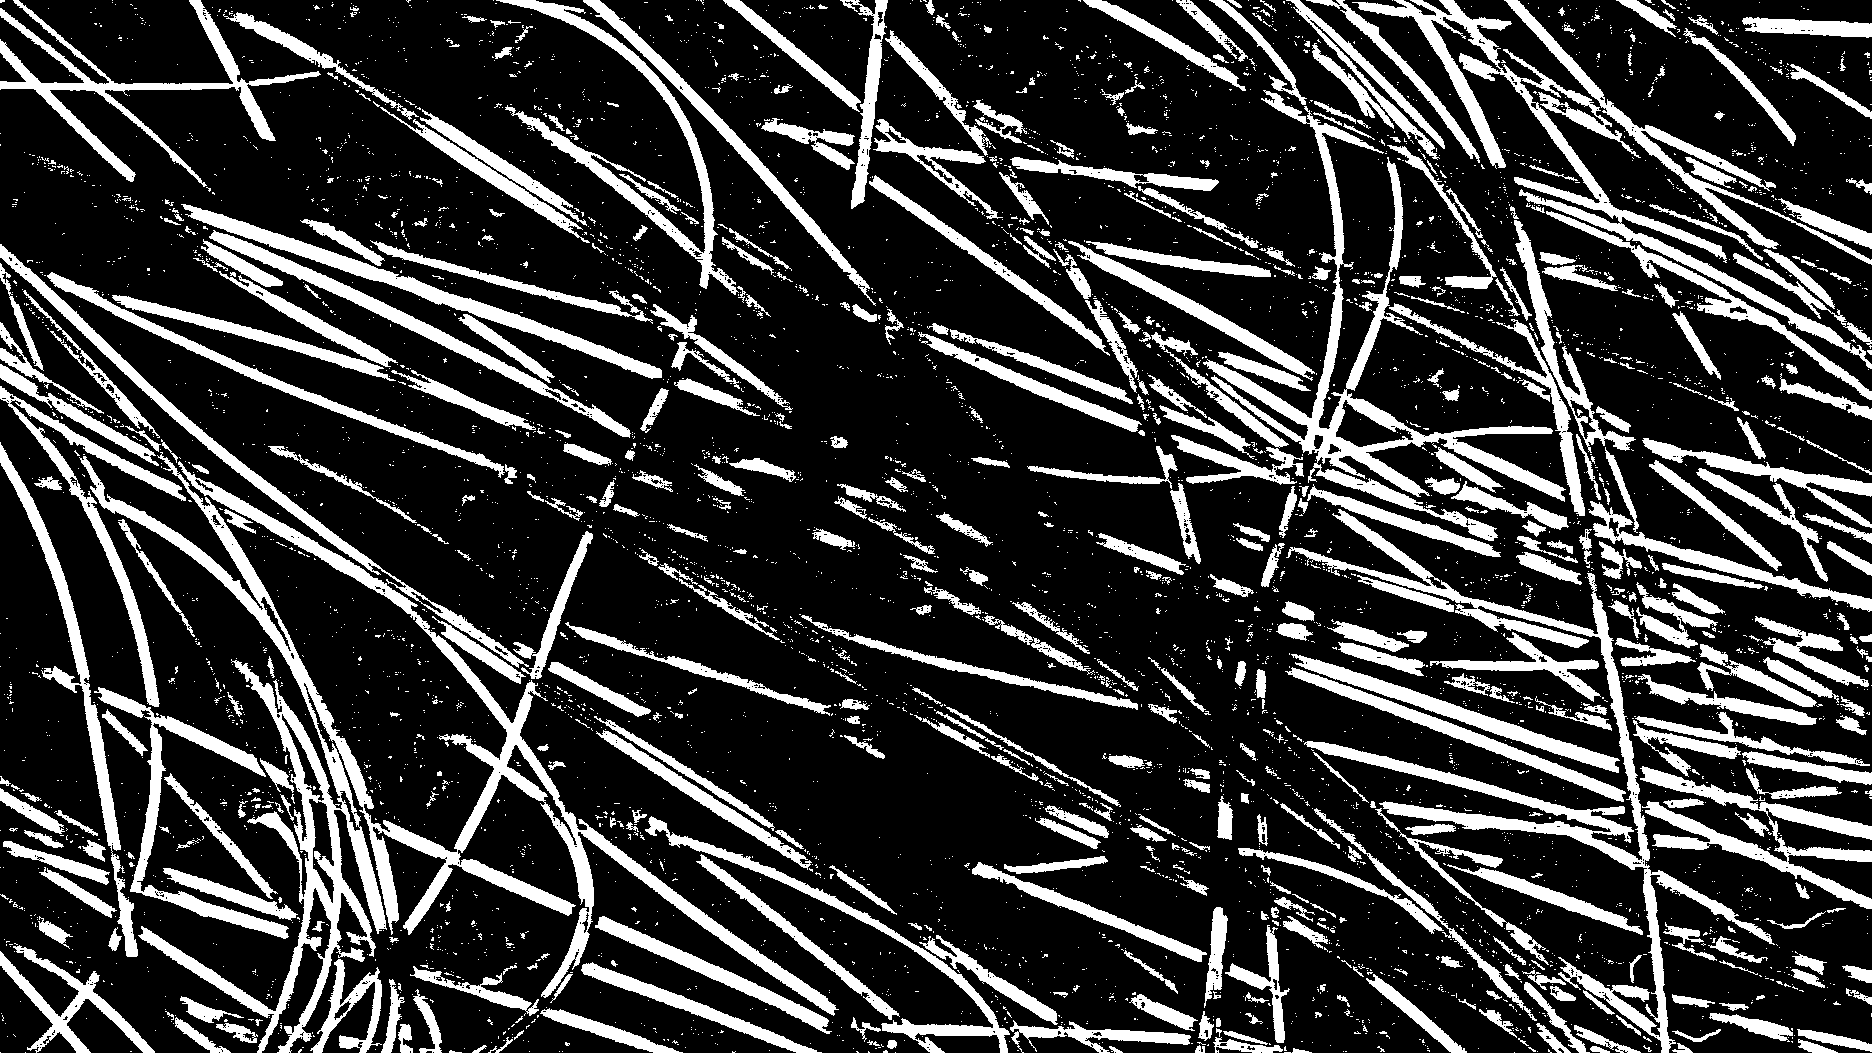

Image after Inpainting


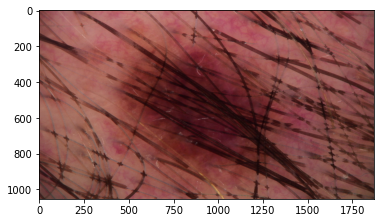

In [21]:
# -*- coding: utf-8 -*-
"""
Following are the DHR tasks followed in this example code:
    
    -- Applying Morphological Black-Hat transformation
    -- Creating the mask for InPainting task
    -- Applying inpainting algorithm on the image
"""
# define location of dataset
folder = '/content/gdrive/My Drive/ISIC-melanoma/train/'
new_storage_folder = '/content/gdrive/My Drive/hair-removal-image/'

start_num = 68279
end_num = 68280

file_startname = 'ISIC_00'

if start_num >= 100000:
  file_startname = 'ISIC_0'
elif start_num >= 1000000:
  file_startname = 'ISIC_'

for i in range (start_num, end_num):
  if os.path.isfile(folder + file_startname + str(i) + '.dcm'):
    filename = folder + file_startname + str(i) + '.dcm'
    # dataset = pydicom.dcmread(filename)

    # print( src.shape )
    # cv2.imshow("original Image" , src )

    # if 'PixelData' in dataset:
    #     rows = int(dataset.Rows)
    #     cols = int(dataset.Columns)
    #     print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
    #         rows=rows, cols=cols, size=len(dataset.PixelData)))
    #     if 'PixelSpacing' in dataset:
    #         print("Pixel spacing....:", dataset.PixelSpacing)

    # # use .get() if not sure the item exists, and want a default value if missing
    # print("Slice location...:", dataset.get('SliceLocation', "(missing)"))
    # print("file name : ", file_startname + str(i))

    # # src = cv2.cvtColor(dataset.pixel_array, cv2.COLOR_RGB2BGR)
    # # src = dataset
    # # src = dataset.pixel_array
    # src = cv2.cvtColor(dataset.pixel_array, cv2.COLOR_RGB2YCrCb)

    # # plt.imshow(src, cmap='gray')
    # # plt.imshow(src)
    # # plt.show()

    # print( src.shape )
    # cv2_imshow(src )

    image_bytes = tf.io.read_file(filename)

    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

    skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)


    # fig, axes = plt.subplots(1,1, figsize=(10,10))
    # axes[0].imshow(np.squeeze(image.numpy()))
    # axes[0].set_title('original image')

    print("original image")
    plt.imshow(np.squeeze(image.numpy()))
    # plt.set_title('original image')
    plt.show()

    src = np.squeeze(image.numpy())

    print(src.shape)
    # cv2_imshow(src)

    # Convert the original image to grayscale
    grayScale = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )
    print("GrayScaled Image")
    cv2_imshow(grayScale)
    # fig, axes = plt.subplots(1,1, figsize=(10,10))
    # axes[0].imshow(grayScale)
    # axes[0].set_title('GrayScaled Image')
    # plt.imshow(grayScale)
    # plt.show()
    cv2.imwrite(file_startname + str(i) + 'grayScale.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))

    # Perform the blackHat filtering on the grayscale image to find the 
    # hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    print("BlackHat filtering result")
    cv2_imshow(blackhat)
    # fig, axes = plt.subplots(1,1, figsize=(10,10))
    # axes[0].imshow(blackhat)
    # axes[0].set_title('BlackHat filtering result')
    # plt.imshow(blackhat)
    # plt.show()
    cv2.imwrite(file_startname + str(i) + 'blackhat.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

    # intensify the hair countours in preparation for the inpainting 
    # algorithm
    # image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint8)
    # src = np.squeeze(image.numpy())
    ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    print("Thresholded image for inpainting")
    # print( thresh2.shape )
    cv2_imshow(thresh2)
    # fig, axes = plt.subplots(1,1, figsize=(10,10))
    # axes[0].imshow(thresh2)
    # axes[0].set_title('Thresholded image for inpainting')
    # plt.imshow(thresh2)
    # plt.show()
    cv2.imwrite(file_startname + str(i) + 'thresholded.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])


    
    # inpaint the original image depending on the mask
    print("Image after Inpainting")
    dst = cv2.inpaint(src.astype('uint8') , thresh2.astype('uint8'), 1,cv2.INPAINT_TELEA)
    # cv2_imshow(dst)
    # fig, axes = plt.subplots(1,1, figsize=(10,10))
    # axes[0].imshow(dst)
    # axes[0].set_title('Image after Inpainting')
    plt.imshow(dst.astype('uint16'))
    plt.show()
    cv2.imwrite(new_storage_folder + file_startname + str(i) + 'Inpainted.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

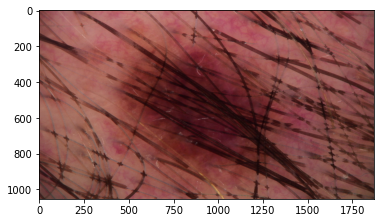

In [22]:
# fig, axes = plt.subplots(1,2, figsize=(10,10))
# axes[0].imshow(dst)
# axes[0].set_title('image')

plt.imshow(dst)
plt.show()